# Algorithme de Simon


## Implémentation

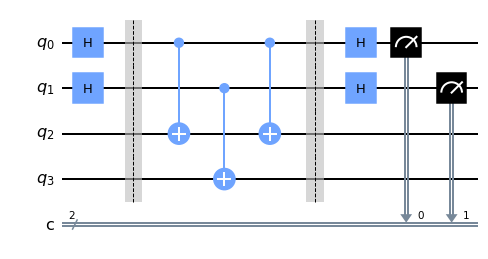

In [45]:
# Module à utiliser pour l'algorithme
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle

# b est le nombre qui définira l'oracle f, si b n'est qu'une chaine de 0 alors la fonction est one-to-one sinon elle est two-to-one
b = '01'

# On récupère ensuite le nombre de Qubits de b car on créer 2 registre de n Qubits pour le programme et n bits classique pour stocker le résultat
n = len(b)
simon_circuit = QuantumCircuit(n*2, n)

# On applique une porte d'Hadamard avant de rentrer dans l'oracle pour le premier registre afin de créer un état superposé
simon_circuit.h(range(n))    
    
# On fait une séparation symbolique entre l'entrée et l'oracle
simon_circuit.barrier()

simon_circuit += simon_oracle(b)

# Une autre séparation à la fin de l'oracle
simon_circuit.barrier()

# On rapplique une porte d'Hadamard sur le premier registre pour inverser le premier Hadamard 
simon_circuit.h(range(n))

# On peut alors effectuer une mesure du circuit et on l'affiche
simon_circuit.measure(range(n), range(n))
simon_circuit.draw('mpl')

## Experimentation

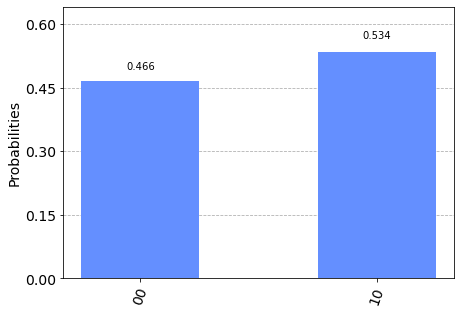

In [46]:
# On simule le l'algorithme pour vérifier le résultat
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
qobj = assemble(simon_circuit, shots=shots)
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)

In [47]:
# On calcule les x pour qui b XOR x = 0, puis on affiche le résultat.
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

# Si on a n solutions, alors f est one-to-one sinon elle est two-to-one
for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

01.00 = 0 (mod 2)
01.10 = 0 (mod 2)


## Rapport

L'algorithme de Simon a été le premier algorithme a montré une augmentation de vitesse exponentielle du quantique par rapport aux ordinateurs quantique. Le but est de savoir si une fonction blackbox f est two-to-one ou one-to-one. C'est à dire si la fonction est f(x) = x ou si il y a un b caché et x1, x2 tel que f(x1) = f(x2) donne x1 XOR x2 = b.